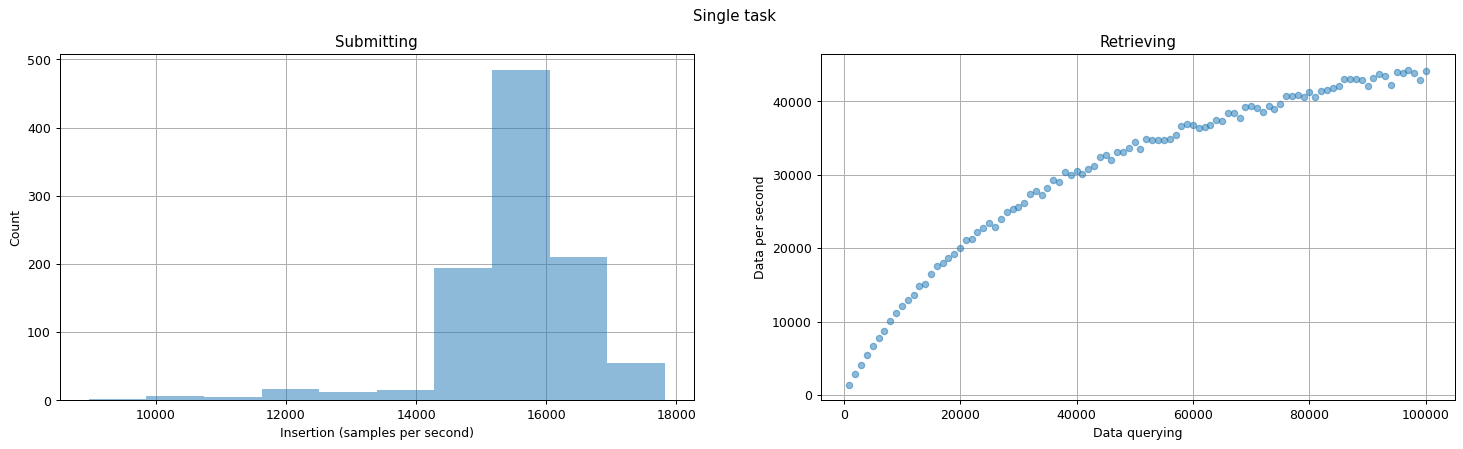

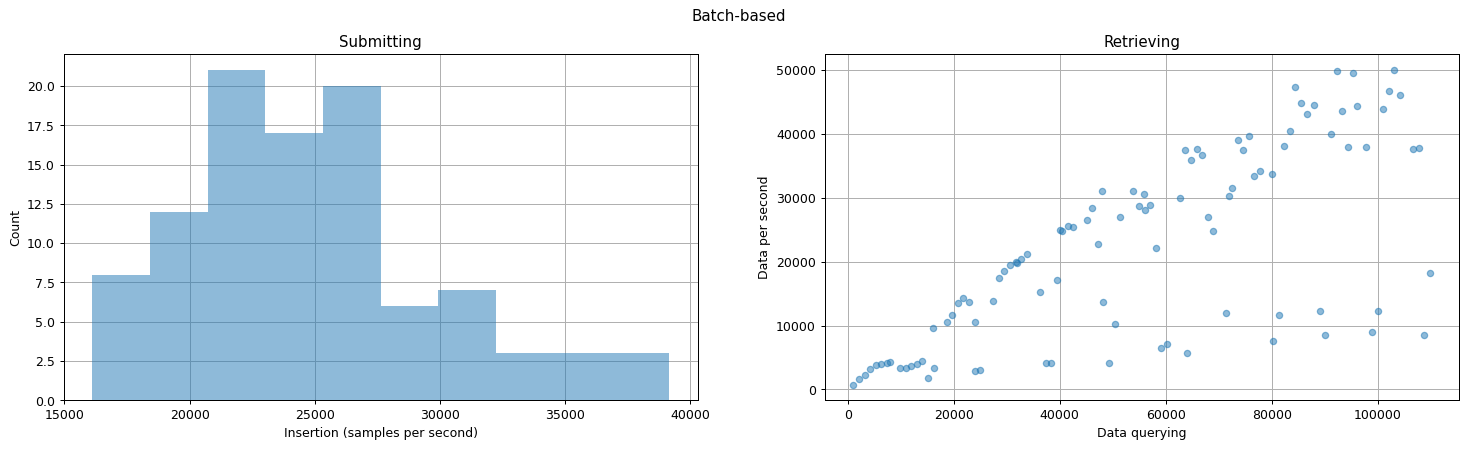

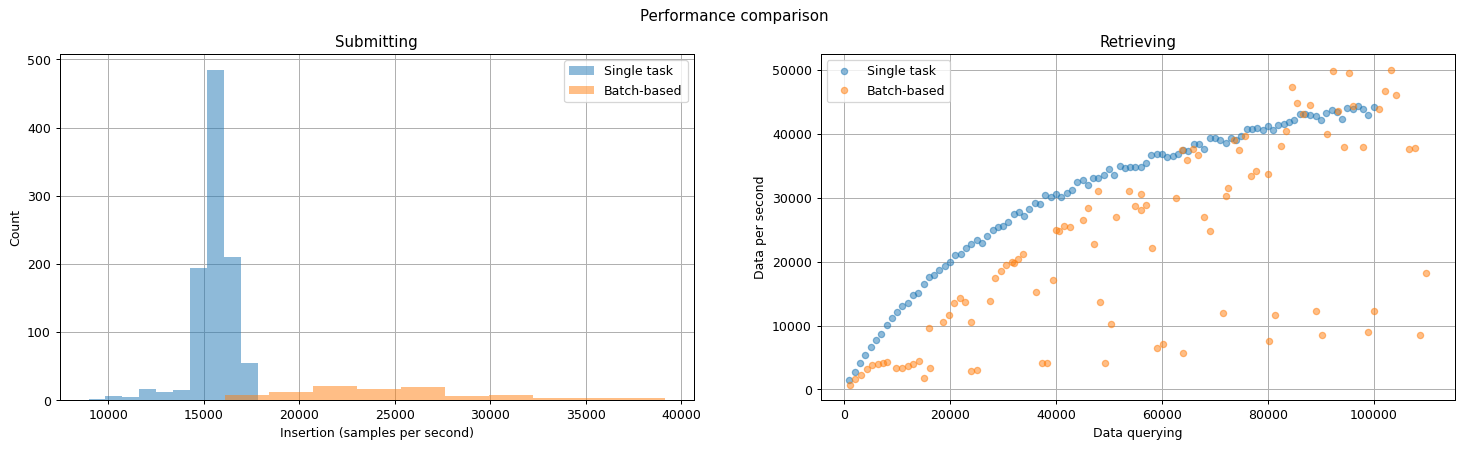

In [46]:
import os
import numpy as np
from matplotlib import pyplot as plt

def viz(submitting_filename, retrieving_filename, window_size=31, suptitle='Performace'):
    performace = np.load(f'{submitting_filename}.npz')['submitting']

    plt.figure(figsize=(20, 5), dpi=90)
    plt.suptitle(suptitle)

    plt.subplot(121)
    plt.hist(performace, color='C0', alpha=0.5, zorder=10)
    plt.title('Submitting')
    plt.xlabel('Insertion (samples per second)')
    plt.ylabel('Count')
    plt.grid(True, zorder=0)

    plt.subplot(122)
    performace = np.load(f'{retrieving_filename}.npz')['retrieving']
    plt.plot(*zip(*performace), 'o', markersize=5, alpha=0.5, zorder=10)
    plt.title('Retrieving')
    plt.xlabel('Data querying')
    plt.ylabel('Data per second')
    plt.grid(True, zorder=0)

def viz2(submitting_filenames, retrieving_filenames, window_size=31, suptitle='Performance comparison'):
    

    plt.figure(figsize=(20, 5), dpi=90)
    plt.suptitle(suptitle)

    plt.subplot(121)


    for i, submitting_filename in enumerate(submitting_filenames):
        performace = np.load(f'{submitting_filename}.npz')['submitting']
        plt.hist(performace, alpha=0.5, zorder=10, label=['Single task', 'Batch-based'][i])
        
    plt.title('Submitting')
    plt.xlabel('Insertion (samples per second)')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True, zorder=0)

    plt.subplot(122)

    for i, retrieving_filename in enumerate(retrieving_filenames):
        performace = np.load(f'{retrieving_filename}.npz')['retrieving']
        plt.plot(*zip(*performace), 'o', markersize=5, alpha=0.5, zorder=10, label=['Single task', 'Batch-based'][i])

    plt.title('Retrieving')
    plt.xlabel('Data querying')
    plt.ylabel('Data per second')
    plt.legend()
    plt.grid(True, zorder=0)

viz('performance/results/submitting.32ch.100chunks', 'performance/results/retrieving.32ch.100chunks', suptitle='Single task')
plt.savefig('performance.png')

viz('performance/results/submitting.32ch.100chunks.1batchsize', 'performance/results/retrieving.32ch.100chunks.10batchsize', suptitle='Batch-based')
plt.savefig('performance_batches.png')

viz2(['performance/results/submitting.32ch.100chunks', 'performance/results/submitting.32ch.100chunks.1batchsize'], ['performance/results/retrieving.32ch.100chunks', 'performance/results/retrieving.32ch.100chunks.10batchsize'])
plt.savefig('performance_comparison.png')

# Performance analysis

In this performance analysis experiment, two fundamental aspects of the system were evaluated: the data submission process to the database and the data retrieval capability. These two components are crucial for measuring the efficiency and speed of the system in terms of data input and extraction.

The objective of this experiment was to obtain accurate information about the system's performance in terms of speed and efficiency in both data submission and retrieval. These results are essential for optimizing the system and ensuring efficient operation in real-world applications.


## Experiment

### Database submitting

In this experiment, the system's performance in the data submission process to the database was evaluated. 32 channels were used, each containing 1 million data points. The data was divided into blocks of one thousand units, and the time required to complete each operation was recorded. To obtain a comparative measure, the time was normalized based on the amount of data sent per second.


### Database retrieving

In this stage of the experiment, the system's capability to retrieve data from the database was analyzed. Requests for packages of varying sizes were made, up to a maximum of 100 thousand data points (including all 32 channels). The time required to complete each operation was recorded and normalized based on the amount of data requested to obtain a measure of the query speed, expressed in data points per second that the system can process.

## Results for single task processing

![Database model](performance.png)

### Database submitting

The histogram displays the distribution of data writing rates in samples per second. The "count" values represent the frequency of occurrence for each data writing rate range, while the "samples per second" values indicate the average rate within each range.

The histogram reveals the following insights:

- The majority of data writing rates fall within the range of 8,967 to 16,052 samples per second.
- The highest frequency of occurrence is observed in the range of 8,967 to 9,853 samples per second, with a count of 194.
- As the data writing rate increases, the frequency of occurrence generally decreases, as seen by the decreasing counts from range to range.
- The lowest frequency is observed in the range of 2 to 6 samples per second, with a count of only 2.

These results suggest that the system exhibits a predominantly consistent and efficient data writing performance, with a peak around 8,967 to 9,853 samples per second. However, there is a notable variation in data writing rates across different ranges, indicating some variability in the system's performance.

### Database retrieving

The given results represent a histogram of data reading speed from a database. The first column indicates the amount of data, and the second column shows the reading speed in data per second.

Based on the results, the following observations can be made:

- The data reading speed increases as the amount of data increases. The reading speed ranges from approximately 1,413 to 44,132 data points per second.

- The reading speed appears to have a generally increasing trend with some fluctuations. However, it reaches a relatively stable range after a certain threshold of data.

- The highest reading speed is observed when reading 100,000 data points, with a value of approximately 44,132 data points per second.

- The reading speed increases gradually as the amount of data increases from 992 to 40,000. After that point, the reading speed experiences fluctuations but generally maintains a relatively high level.

- There are occasional dips in reading speed within certain ranges, such as between 60,000 and 70,000 data points.

These findings provide insights into the performance characteristics of the database reading process. They suggest that the system is capable of efficiently reading data at higher speeds, especially for larger amounts of data. However, it is important to consider the specific requirements and constraints of the application to ensure optimal performance.

## Results for batched task processing

![Database model](performance_batches.png)

### Database submitting

The histogram displays the distribution of data writing rates in samples per second for another configuration of the experiment. The "count" values represent the frequency of occurrence for each data writing rate range, while the "samples per second" values indicate the average rate within each range.

The histogram reveals the following insights:

- The data writing rates are spread across a range of approximately 16,117 to 39,154 samples per second.
- The highest frequency of occurrence is observed in the range of 20,724 to 25,332 samples per second, with a count of 21.
- There is a relatively balanced distribution of data writing rates across the different ranges, with counts ranging from 3 to 21.

These results suggest that the system exhibits a relatively consistent and balanced data writing performance across different rates. There is no significant skew or dominance in any particular range. The distribution of data writing rates is relatively even, indicating a stable and reliable performance of the system.

It is important to note that these results are based on the provided dataset and may not represent the entire population. Further analysis and testing may be required to obtain a comprehensive understanding of the system's data writing performance.

### Database retrieving

The experiment results show the relationship between the amount of data and the reading speed in a database. The data is presented in a two-column format, where the first column represents the amount of data and the second column represents the reading speed in data per second.

Upon analyzing the results, several observations can be made:

1. As the amount of data increases, the reading speed generally improves. This can be seen from the increasing values in the second column as the values in the first column increase.

2. The relationship between the amount of data and reading speed is not strictly linear. Initially, the reading speed increases at a relatively slower rate, but as the amount of data grows larger, the reading speed shows a more significant improvement.

3. There are fluctuations in the reading speed at certain points. These fluctuations could be attributed to various factors such as system load, database configuration, or other external factors affecting the performance.

4. It is worth noting that the highest reading speeds are achieved at specific amounts of data, indicating potential optimization points in the database system.

These results provide insights into the performance characteristics of the database system under different data loads and can be used to guide further optimizations or capacity planning.

## Results comparison and conclusion

![Database model](performance_comparison.png)

### Database submitting

The provided results represent two different configurations of the experiment: one with normal data writing and the other with data writing in batches. A comparison between the two can provide insights into the performance differences between these approaches.

For the normal data writing configuration:
- The data writing rates range from approximately 8,967 to 16,052 samples per second.
- The peak frequency of occurrence is observed in the range of 8,967 to 9,853 samples per second, with a count of 194.

For the data writing in batches configuration:
- The data writing rates range from approximately 16,117 to 39,154 samples per second.
- There is a relatively balanced distribution of data writing rates across the different ranges, with counts ranging from 3 to 21.

Based on these results, the following conclusions can be drawn:

1. Performance Difference: The data writing in batches configuration exhibits higher data writing rates compared to the normal data writing configuration. The peak rate in the batches configuration reaches approximately 39,154 samples per second, which is significantly higher than the peak rate in the normal configuration.

2. Efficiency Improvement: The data writing in batches approach appears to improve the efficiency of the system in terms of data writing. It allows for higher throughput and faster data writing rates, as evidenced by the higher counts in the higher rate ranges.

3. Trade-off Considerations: While the data writing in batches configuration shows improved performance, it is essential to consider trade-offs such as increased complexity in managing batch operations and potential trade-offs in data consistency or latency.

These conclusions suggest that utilizing data writing in batches can significantly enhance the data writing performance of the system, allowing for higher throughput and improved efficiency. However, it is crucial to carefully consider the trade-offs and assess the specific requirements and constraints of the application before implementing such an approach.


### Database retrieving

The experiment compared the reading performance of a database using two different approaches: normal reading and reading with batches. The results are presented in two sets of data, where the first set represents the normal reading configuration and the second set represents the batch reading configuration. Each set contains two columns, with the first column indicating the amount of data and the second column indicating the reading speed in data per second.

Upon comparing the results, the following observations can be made:

1. Overall, the batch reading approach outperforms the normal reading approach in terms of reading speed. This can be observed by comparing the values in the second column between the two sets of data. The batch reading approach consistently shows higher reading speeds for each corresponding amount of data.

2. The improvement in reading speed with the batch reading approach becomes more significant as the amount of data increases. The performance gap between the two approaches widens as the data size grows larger.

3. In both approaches, there are fluctuations in the reading speed at certain points. These fluctuations could be influenced by factors such as system load, database configuration, or other external factors affecting the performance.

4. It is important to note that the batch reading approach may require additional resources or have implications on memory usage due to the nature of processing data in batches. These considerations should be taken into account when deciding on the most suitable approach for a specific scenario.

Based on these results, it can be concluded that utilizing the batch reading approach can significantly improve the reading speed in a database, especially when dealing with large amounts of data. However, the specific benefits and trade-offs should be evaluated in the context of the system requirements and constraints.

